In [44]:
import pandas as pd
import numpy as np
from glob import glob
import torch, os, random
from torch.nn import *
from torch.utils.data import Dataset, DataLoader, random_split
from matplotlib import pyplot as plt
from PIL import Image
import torchvision.transforms as T

In [45]:
class CustomDataset(Dataset):
    
    def __init__(self, root, transformation = None, im_type = [".png", '.jpg', '.jpeg']):
        super(). __init__()
        self.data_path = [im for im in sorted(glob(f"{root}/*/*[{type for type in im_type}]"))]
        self.transformation = transformation
        self.class_names = {} # for class dictionary
        klass_qiymati = 0
        # self.labels = []
        # for idx, name in enumerate(self.data_path):
        #     label = self.get_class_names(name)
        #     self.labels.append(label)
        #     self.uniq_class = [c for c in np.unique(list(self.labels))]
        #     self.class_names = {keys: value for value, keys in enumerate(self.uniq_class)}
 
        for idx, yulak in enumerate(self.data_path):
            klass_nomi = self.get_class_names(yulak)
            if klass_nomi not in self.class_names: self.class_names[klass_nomi] = klass_qiymati; klass_qiymati += 1
            
    # function for getting class from dataset
    def get_class_names(self, path):
        return os.path.dirname(path).split("\\")[-1]


    def __len__(self):
             len(self.data_path)

    def __getitem__(self, idx):
        ims = self.data_path[idx]
        im = Image.open(ims).convert("RGB")
        
        gt = self.class_names[self.get_class_names(ims)]

        if self.transformation is not None: im = transformer(im) 
            
        return im, gt
        
            
transformer = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor()])             
root = "Rice Leaf  Disease Dataset"  
data = CustomDataset(root, transformation = transformer)
classlar = data.class_names
classlar


{'Brown Spot': 0,
 'False smut': 1,
 'Healthy': 2,
 'Material Leaf Blight': 3,
 'Rice Blast': 4,
 'Stem rot': 5,
 'Tungro': 6,
 'sheath_blight': 7}

In [46]:
class CustomDataset(Dataset):
    def __init__(self, root,  im_type = [".png", '.jpg', '.jpeg'], transformations = None):
        super(). __init__()
        
        self.transformations = transformations
        self.im_paths = [im for im in sorted(glob(f"{root}/*/*[{type for type in im_type}]"))]
        self.labels = []
        self.class_name_dict = {}
        klass_qiymati = 0

        # for idx, im_path in enumerate(self.im_paths):
        #     label = self.get_class_names(im_path)
        #     self.labels.append(label)
        #     self.uniq_class = [c for c in np.unique(list(self.labels))]
        #     self.class_name_dict = {keys: values for values , keys in enumerate(self.uniq_class)}
        for idx, yulak in enumerate(self.im_paths):
            klass_nomi = self.get_class_names(yulak)
            if klass_nomi not in self.class_name_dict: self.class_name_dict[klass_nomi] = klass_qiymati; klass_qiymati += 1
    
    # function for getting class_name from dataset
    def get_class_names(self, path):
        return os.path.dirname(path).split("\\")[-1]

        
    def __len__(self):
        return len(self.im_paths)



    def __getitem__(self, idx):
        ims = self.im_paths[idx]
        im = Image.open(ims).convert("RGB")

        gt = self.class_name_dict[self.get_class_names(ims)]
 

        if self.transformations is not None: im =self.transformations(im)

        return im, gt
transformer = T.Compose([
    T.Resize((224, 224)),
    T.ToTensor()])        
root = "Rice Leaf  Disease Dataset"  
data = CustomDataset(root, transformations= transformer )
classlar = data.class_name_dict
print(classlar)
len(data)

{'Brown Spot': 0, 'False smut': 1, 'Healthy': 2, 'Material Leaf Blight': 3, 'Rice Blast': 4, 'Stem rot': 5, 'Tungro': 6, 'sheath_blight': 7}


595

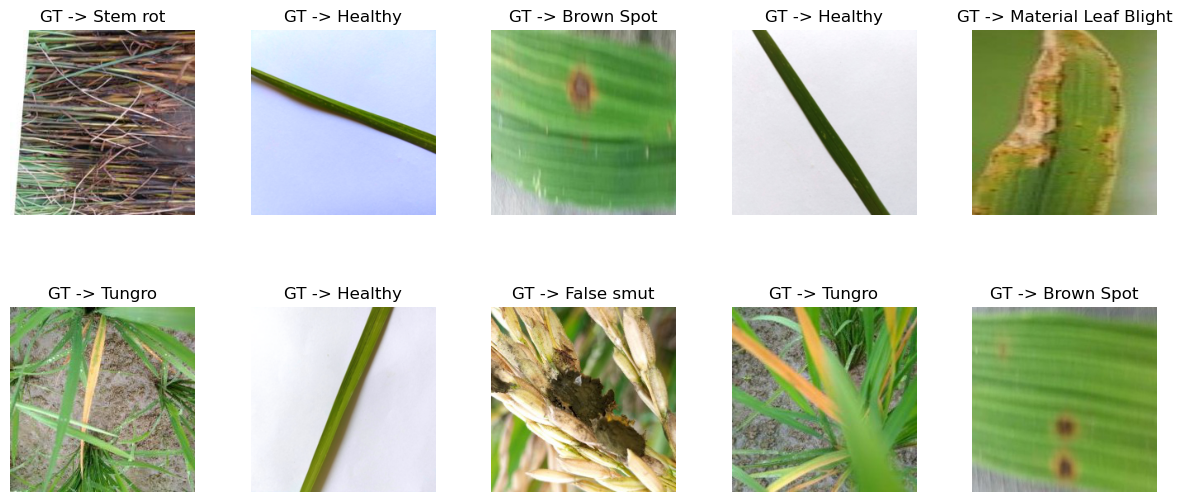

In [47]:
import random
import matplotlib.pyplot as plt
rows = 2
def display_random_images(data, classlar, data_soni=10, rows=rows, cols=5):
    class_n = list(classlar.keys())
    index = [random.randint(0, len(data)-1) for _ in range(data_soni)]

    
    fig, axes = plt.subplots(rows, cols, figsize=(15, 6))
    fig.subplots_adjust(hspace=0.5)
    
    for idx, ax in zip(index, axes.flatten()):
        im, gt = data[idx]
        ax.imshow((im * 255).cpu().permute(2, 1, 0).numpy().astype("uint8"))
        ax.axis("off")
        ax.set_title(f"GT -> {class_n[gt]}")

display_random_images(data, classlar, data_soni=10, rows=rows, cols=5)


In [48]:
#  split data to train, valid, test date
split_data = [0.8,0.1,0.1]
len_data = len(data)
tr_len = int(len_data*split_data[0])
val_len = int(len_data*split_data[1])
ts_len = len_data-(tr_len+val_len)

tr_ds, val_ds, ts_ds = random_split(dataset=data, lengths=[tr_len, val_len, ts_len ])
print(tr_len)
print(val_len)
print(ts_len)



476
59
60


`Dataload`

In [49]:
# to get dataloader
bs=8
tr_dl = DataLoader(dataset = tr_ds, batch_size = bs, shuffle = True, num_workers= 0)
val_dl = DataLoader(dataset = val_ds, batch_size = bs, shuffle = False, num_workers= 0)
ts_dl = DataLoader(dataset = ts_ds, batch_size = bs, shuffle = False, num_workers= 0)
print(len(tr_dl))
print(len(val_dl))
print(len(ts_dl))


60
8
8


In [56]:
import timm
model = timm.create_model(model_name="rexnet_200", pretrained=True, num_classes = len(classlar))
device = "cuda" if torch.cuda.is_available() else 'cpu'
loss_fn = CrossEntropyLoss()
optimizer = torch.optim.SGD(params=model.parameters(), lr=0.001)
model.to(device)


RexNet(
  (stem): ConvNormAct(
    (conv): Conv2d(3, 64, kernel_size=(3, 3), stride=(2, 2), padding=(1, 1), bias=False)
    (bn): BatchNormAct2d(
      64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
      (drop): Identity()
      (act): SiLU(inplace=True)
    )
  )
  (features): Sequential(
    (0): LinearBottleneck(
      (conv_dw): ConvNormAct(
        (conv): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), groups=64, bias=False)
        (bn): BatchNormAct2d(
          64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
      )
      (act_dw): ReLU6()
      (conv_pwl): ConvNormAct(
        (conv): Conv2d(64, 32, kernel_size=(1, 1), stride=(1, 1), bias=False)
        (bn): BatchNormAct2d(
          32, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True
          (drop): Identity()
          (act): Identity()
        )
      )
    )
    (1): LinearBottlene

In [57]:
from tqdm import tqdm
def train(model, tr_dl, val_dl, loss_fn, opt, epoch, save_prefix, threshold, device):
    
    tr_epoch_loss, val_epoch_loss = [],[]
    tr_acc_sc, val_acc_cs =[],[]
    best_loss = np.inf

    
    print("Train is starting ....")
    for epoc in range(epoch):
                
        tr_acc, tr_loss, tr_total=0,0,0
        for idx, batch in enumerate(tqdm(tr_dl)):
            im, gt = batch
            im, gt = im.to(device), gt.to(device)
         #prediction model
            pred = model(im)
        # get the losses using loss function
            loss = loss_fn(pred, gt)
            tr_loss+=loss.item()
         # getting prediction class and train accurancy score
            pred_class = torch.argmax(pred, dim=1)
            tr_acc+=(pred_class==gt).sum().item()
            tr_total+=im.shape[0]

        # perform optimization steps
            opt.zero_grad()
            loss.backward()
            opt.step()
        
        tr_acc/=tr_total   
        tr_loss/=len(tr_dl)
        # Appends the training accuracy and loss to their respective lists.
        tr_acc_sc.append(tr_acc)
        tr_epoch_loss.append(tr_loss)
        model.eval() # Set the model to evaluation mode
        with torch.no_grad(): # Gradients will not be calculated for the operations inside this block
            val_acc, val_loss, val_total = 0,0,0
            for idx, batch in enumerate(tqdm(val_dl)):
                im, gt = batch
                im, gt = im.to(device), gt.to(device)
            # prediction validation model with no_grad
                pred = model(im)
             # get Losses using loss function
                loss = loss_fn(pred, gt)
            # getting prediction class and train accurancy score
                loss_class = torch.argmax(pred, dim =1)
                val_acc+=(loss_class==gt).sum().item()
                val_loss+=loss.item()
                val_total+=im.shape[0]
            # Calculates average validation accuracy and loss for the epoch.  
            val_acc/=val_total
            val_loss/=len(val_dl)
            # Appends validation accuracy and loss to their respective lists.
            val_acc_cs.append(val_acc)
            val_epoch_loss.append(val_loss)
            
            print(f"{epoc+1}- epoch Train proses is finished..")
            print(f"{epoc+1}- epoch Train Accurancy score            -> {tr_acc:.3f}")
            print(f"{epoc+1}- epoch Train  loss                      -> {tr_loss:.3f}\n")
            print(f"{epoc+1}- epoch Validation proses is finished. \n")
            print(f"{epoc+1}- epoch Validation  Accurancy score       -> {val_acc:.3f}")
            print(f"{epoc+1}- epoch  Validation  loss                 -> {val_loss:.3f}\n")
            # Saves the best model to best_model folder
            if val_loss < (best_loss + threshold):
                val_loss = best_loss
                os.makedirs("best_model", exist_ok=True)
                torch.save(model, f"best_model/{save_prefix}_best_model.pht")
            
    return {"tr_acc_sc" : tr_acc_sc, "tr_epoch_loss": tr_epoch_loss, "val_acc_cs": val_acc_cs, "val_epoch_loss": val_epoch_loss}     

result = train(model= model.to(device), tr_dl = tr_dl, val_dl=val_dl, loss_fn = loss_fn,  opt = optimizer, epoch = 10,
               save_prefix = "rice", device= device, threshold =0.001)

Train is starting ....


100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  4.20it/s]


1- epoch Train proses is finished..
1- epoch Train Accurancy score            -> 0.342
1- epoch Train  loss                      -> 2.445

1- epoch Validation proses is finished. 

1- epoch Validation  Accurancy score       -> 0.712
1- epoch  Validation  loss                 -> 0.843



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.24it/s]


2- epoch Train proses is finished..
2- epoch Train Accurancy score            -> 0.767
2- epoch Train  loss                      -> 0.767

2- epoch Validation proses is finished. 

2- epoch Validation  Accurancy score       -> 0.661
2- epoch  Validation  loss                 -> 0.823



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.74it/s]


3- epoch Train proses is finished..
3- epoch Train Accurancy score            -> 0.931
3- epoch Train  loss                      -> 0.233

3- epoch Validation proses is finished. 

3- epoch Validation  Accurancy score       -> 0.898
3- epoch  Validation  loss                 -> 0.347



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.84it/s]


4- epoch Train proses is finished..
4- epoch Train Accurancy score            -> 0.985
4- epoch Train  loss                      -> 0.044

4- epoch Validation proses is finished. 

4- epoch Validation  Accurancy score       -> 0.898
4- epoch  Validation  loss                 -> 0.378



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.71it/s]


5- epoch Train proses is finished..
5- epoch Train Accurancy score            -> 0.996
5- epoch Train  loss                      -> 0.030

5- epoch Validation proses is finished. 

5- epoch Validation  Accurancy score       -> 0.949
5- epoch  Validation  loss                 -> 0.117



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.40it/s]


6- epoch Train proses is finished..
6- epoch Train Accurancy score            -> 1.000
6- epoch Train  loss                      -> 0.004

6- epoch Validation proses is finished. 

6- epoch Validation  Accurancy score       -> 0.966
6- epoch  Validation  loss                 -> 0.072



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.41it/s]


7- epoch Train proses is finished..
7- epoch Train Accurancy score            -> 1.000
7- epoch Train  loss                      -> 0.002

7- epoch Validation proses is finished. 

7- epoch Validation  Accurancy score       -> 0.983
7- epoch  Validation  loss                 -> 0.070



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.42it/s]


8- epoch Train proses is finished..
8- epoch Train Accurancy score            -> 1.000
8- epoch Train  loss                      -> 0.001

8- epoch Validation proses is finished. 

8- epoch Validation  Accurancy score       -> 0.983
8- epoch  Validation  loss                 -> 0.070



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.42it/s]


9- epoch Train proses is finished..
9- epoch Train Accurancy score            -> 1.000
9- epoch Train  loss                      -> 0.001

9- epoch Validation proses is finished. 

9- epoch Validation  Accurancy score       -> 0.983
9- epoch  Validation  loss                 -> 0.069



100%|████████████████████████████████████████████████████████████████████████████████████| 8/8 [00:01<00:00,  6.55it/s]

10- epoch Train proses is finished..
10- epoch Train Accurancy score            -> 1.000
10- epoch Train  loss                      -> 0.001

10- epoch Validation proses is finished. 

10- epoch Validation  Accurancy score       -> 0.983
10- epoch  Validation  loss                 -> 0.068



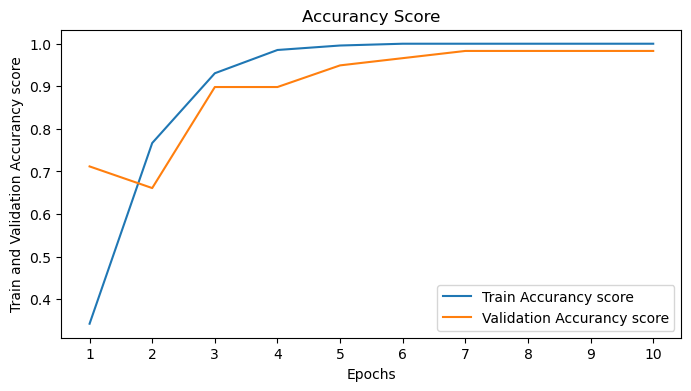

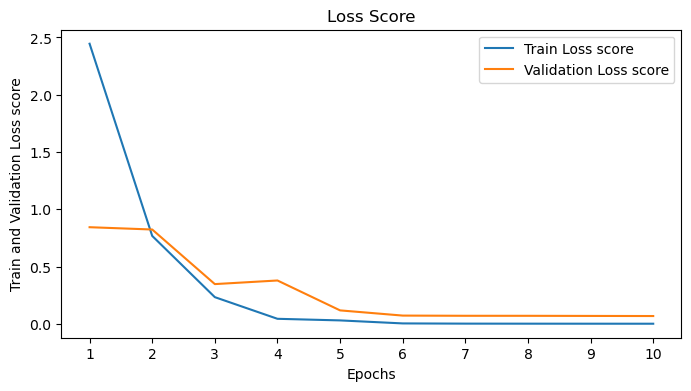

In [58]:
def ploter(result):
    plt.figure(figsize=(8, 4))
    plt.plot(result['tr_acc_sc'], label = "Train Accurancy score")
    plt.plot(result['val_acc_cs'], label = "Validation Accurancy score")
    plt.title("Accurancy Score")
    plt.ylabel("Train and Validation Accurancy score")
    plt.xticks(np.arange(len(result['val_acc_cs'])), [ i for i in range(1, len(result["val_acc_cs"])+ 1)])
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()
    
    plt.figure(figsize=(8, 4))
    plt.plot(result['tr_epoch_loss'], label = "Train Loss score")
    plt.plot(result['val_epoch_loss'], label = "Validation Loss score")
    plt.xticks(np.arange(len(result['val_acc_cs'])), [ i for i in range(1, len(result["val_acc_cs"])+ 1)])
    plt.title("Loss Score")
    plt.ylabel("Train and Validation Loss score")
    plt.xlabel("Epochs")
    plt.legend()
    plt.show()
ploter(result)

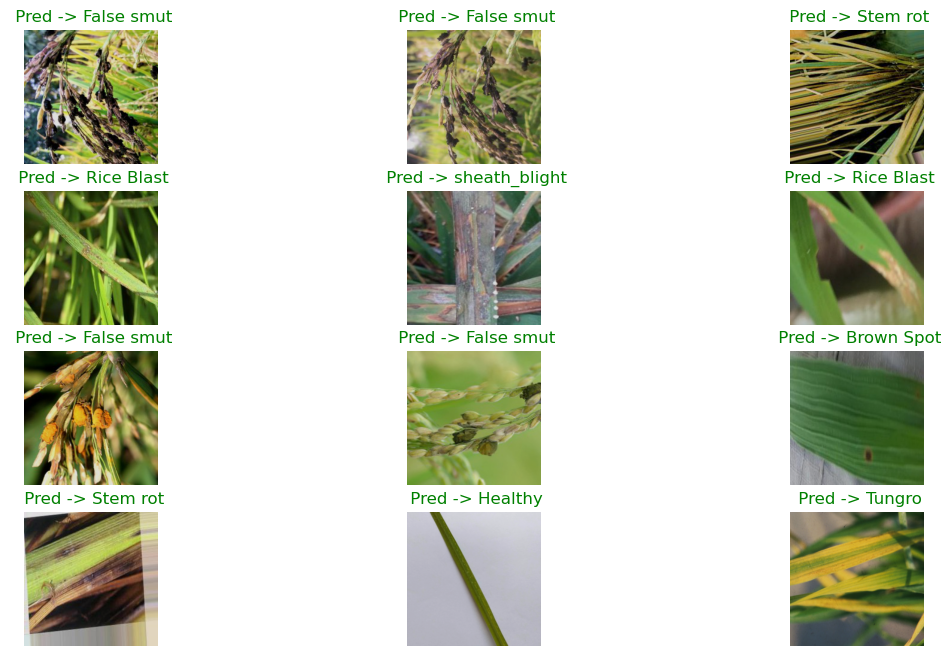

In [60]:
import torch
import matplotlib.pyplot as plt

def inference(data, model, device, number_im, images_per_row, class_name=None):
    ims, preds = [], []
    for idx, batch in enumerate(data):
        if idx == number_im:
            break
        im = batch
        ims.append(im)
        pred = torch.argmax(model(im[0].unsqueeze(dim=0).to(device)), dim=1).item()
        preds.append(pred)

    plt.figure(figsize=(14, 8))
    for row in range(0, number_im, images_per_row):
        for cal in range(images_per_row):
            index = cal + row
            if index < number_im:
                im = ims[index]
                plt.subplot(number_im // images_per_row, images_per_row, index + 1)
                plt.imshow((im[0].cpu() * 225).permute(2, 1, 0).numpy().astype("uint8"))
                plt.axis("off")
                if class_name is not None:
                    title_color = 'green' if class_name[preds[index]] == class_name[im[1]] else 'red'
                    plt.title(f" Pred -> {class_name[preds[index]]}", color=title_color)
                else:
                    plt.title(f"Prediction: {preds[index]}")
    plt.show()

# Assuming you have defined classlar and ts_ds
model = torch.load("best_model/rice_best_model.pht")
inference(data=ts_ds, model=model.to(device), device=device, number_im=12, class_name=list(classlar.keys()), images_per_row=3)


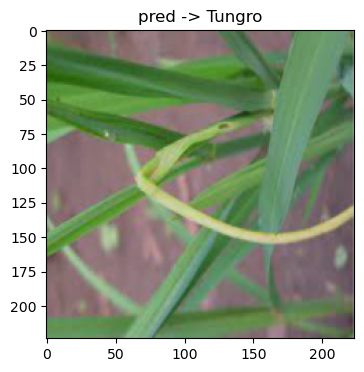

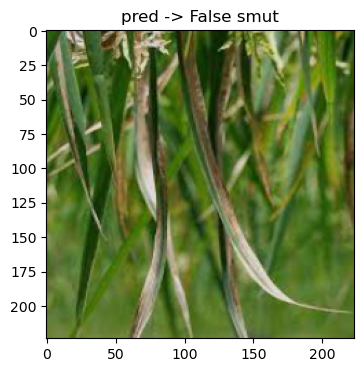

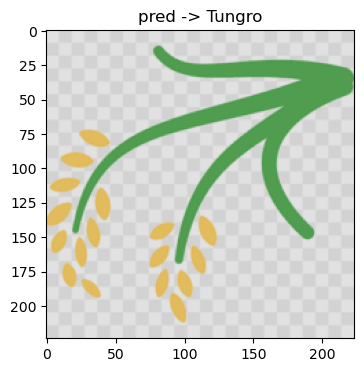

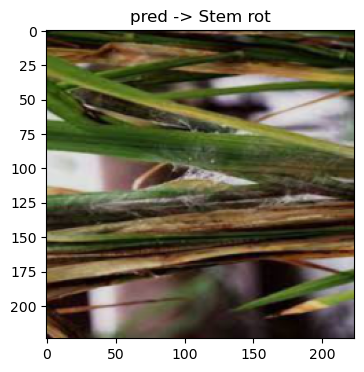

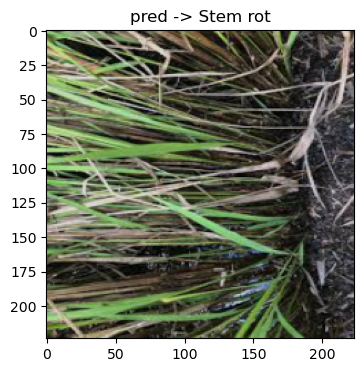

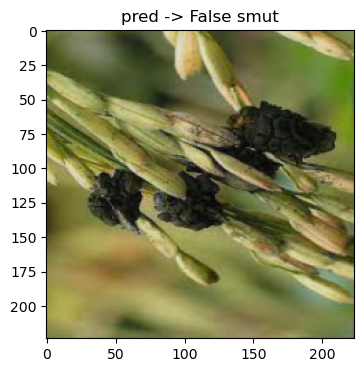

In [64]:
def process_images_predict(model, device, root, file_type = ['.png', '.jpg' '.jpeg']):
    ims, preds = [],[]
    transformer = T.Compose([T.Resize((224, 224)),
                            T.ToTensor()])
    im_path = glob(f"{root}/*[{ i for i in file_type}]")
    for idx, path in enumerate(im_path):
        im = Image.open(path).convert("RGB")
        im_2_tensor = transformer(im)
        ims.append(im_2_tensor)
        
        pred = torch.argmax(model(im_2_tensor.unsqueeze(dim = 0).to(device)), dim=1).item()
        preds.append(pred)

        plt.figure(figsize=(8, 4))
        plt.imshow((im_2_tensor*225).cpu().permute(2,1,0).numpy().astype("uint8"))
        plt.title(f"pred -> {list(classlar.keys())[pred]}")
        plt.show()
root = "rices"
process_images_predict(model=model.to(device), root=root, device = device)